# Mortgage Difficulty Probability Model
### *The purpose of this exercise is to leverage Machine Learning methodology to estimate the probability that an individual will have difficulty meeting payments for their home loan.*
Our TARGET is defined as – an individual with payment difficulties: he/she has had a late payment on at least one of the initial installments of the loan.
<br>
<br>
A couple notes...
<br>
1) When looking at predicted probabilities, the dataset will not balance the target classification. When predicting the outcome, the dataset will be balanced to yield accurate counts of the target variable.
<br>
<br>
2) This is a borrowed dataset that was intended for EDA, and thus the model is designed around the data present.<br> *A proper mortgage delinquency model would feature stages that track the performance of individual loans over time and score loans based on 30, 60, 90 day delinquencies, loan cures, and loan defaults. This dataset does not provide this level of detail, thus a simplified approach of providing a risk probability given the target will be taken.*
***

## Initial Data Processing

#### Load Data

In [608]:
import pandas as pd
import numpy as np

data = pd.read_csv("Data/application_data.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# view columns and sample of data
data.head().append(data.tail())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Data Cleaning

In [609]:
data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

## Explore Data

In [610]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Numerical Variables

In [611]:
num_cols = [cname for cname in data.columns
                  if data[cname].dtype in ['int64', 'float64']]

# remove columns
for i in range(1,21):
    num_cols.remove('FLAG_DOCUMENT_' + str(i+1))
num_cols.remove('SK_ID_CURR')

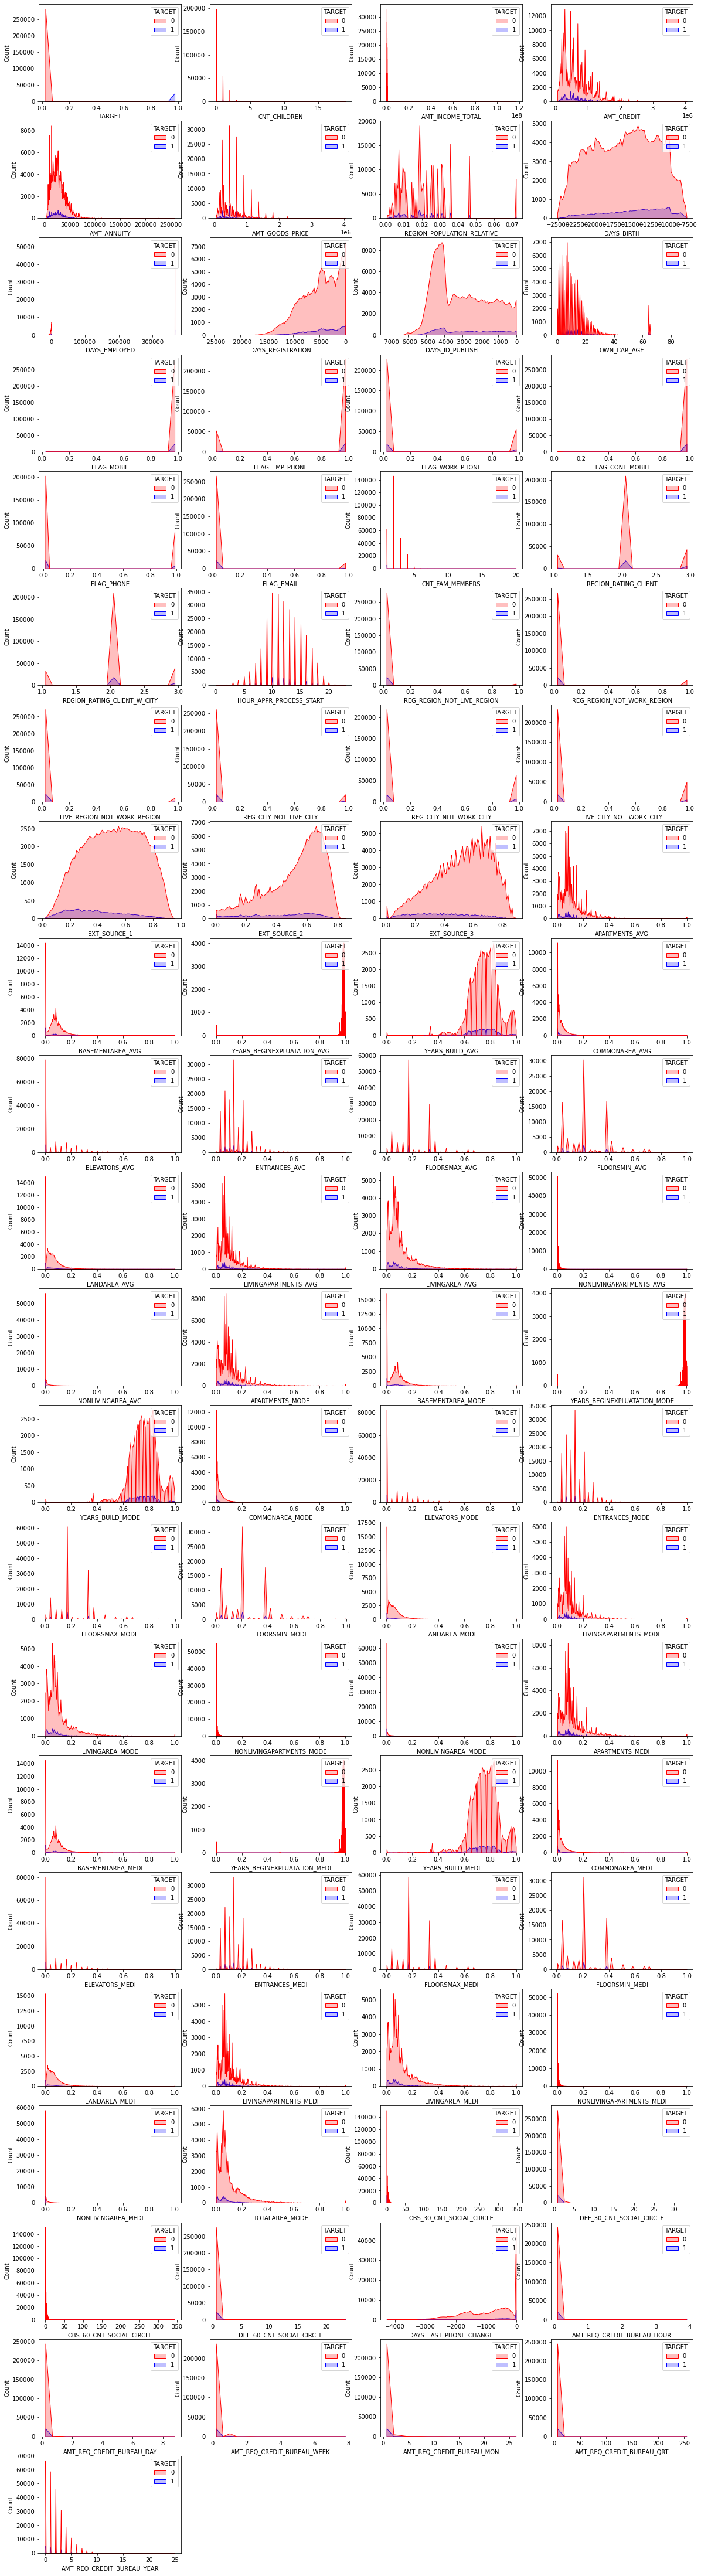

In [612]:
plt.figure(figsize = (20,80))
for i in enumerate(num_cols):
    plt.subplot(22,4,i[0]+1)
    sns.histplot(x = i[1], hue='TARGET', data=data, element='poly', palette=["r", "b"])

#### Numerical Variable Correlation

In [613]:
data[num_cols].apply(lambda x: x.corr(data[num_cols].TARGET)).sort_values()

EXT_SOURCE_3                   -0.178919
EXT_SOURCE_2                   -0.160472
EXT_SOURCE_1                   -0.155317
DAYS_EMPLOYED                  -0.044932
FLOORSMAX_AVG                  -0.044003
FLOORSMAX_MEDI                 -0.043768
FLOORSMAX_MODE                 -0.043226
AMT_GOODS_PRICE                -0.039645
REGION_POPULATION_RELATIVE     -0.037227
ELEVATORS_AVG                  -0.034199
ELEVATORS_MEDI                 -0.033863
FLOORSMIN_AVG                  -0.033614
FLOORSMIN_MEDI                 -0.033394
LIVINGAREA_AVG                 -0.032997
LIVINGAREA_MEDI                -0.032739
FLOORSMIN_MODE                 -0.032698
TOTALAREA_MODE                 -0.032596
ELEVATORS_MODE                 -0.032131
LIVINGAREA_MODE                -0.030685
AMT_CREDIT                     -0.030369
APARTMENTS_AVG                 -0.029498
APARTMENTS_MEDI                -0.029184
APARTMENTS_MODE                -0.027284
LIVINGAPARTMENTS_AVG           -0.025031
LIVINGAPARTMENTS

#### Missing Numerical Variables

In [614]:
from sklearn.impute import SimpleImputer

# define imputer model
imputer = SimpleImputer(strategy = 'mean')

# fit & transform
num_imputed = pd.DataFrame(imputer.fit_transform(data[num_cols]))

# add imputed columns back to data
data[num_cols] = num_imputed

#### Process Numerical Outliers

In [615]:
# set upper and lower limits
upper_limit = 0.999
lower_limit = 1 - upper_limit

# columns to remove outliers from
out = ['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'TOTALAREA_MODE']

for i in enumerate(out):
    # find upper and lower
    upper = data[i[1]].quantile(upper_limit)
    lower = data[i[1]].quantile(lower_limit)
    # view omissions (commented out because there are so many to display)
    #display(data[data[i[1]] < lower].append(data[data[i[1]] > upper]))
    # remove from data
    data = data[(data[i[1]] > lower) & (data[i[1]] < upper)]

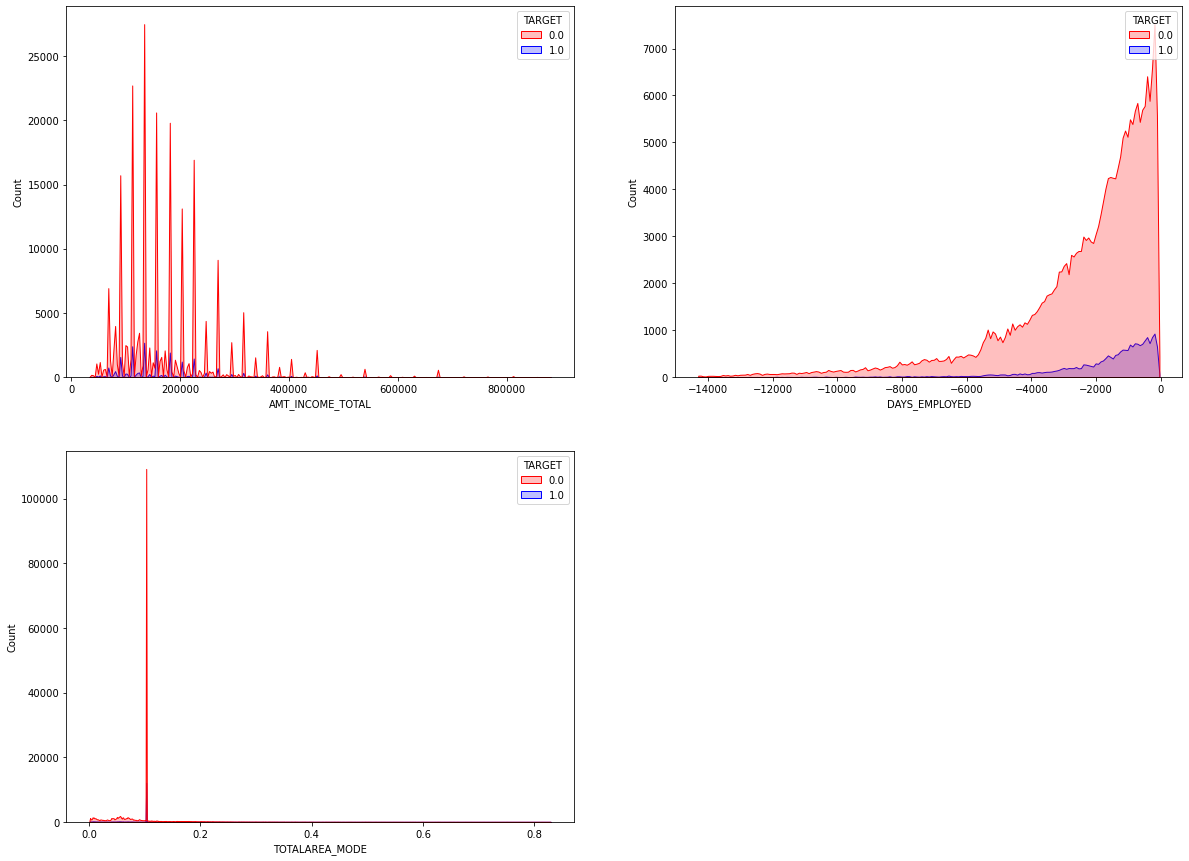

In [616]:
# view processed distributions with outliers removed
plt.figure(figsize = (20,15))
for i in enumerate(out):
    plt.subplot(2,2,i[0]+1)
    sns.histplot(x = i[1], hue='TARGET', data=data, element='poly', palette=["r", "b"])

#### Categorical Variables

In [617]:
# select categorical variables
obj_cols = [cname for cname in data.columns
                  if data[cname].dtype == 'object']

# fill NaN with NA
data[obj_cols] = data[obj_cols].fillna('NA')

In [618]:
# view unique values in categorical variables
for col in data[obj_cols]:
    print(str(data[obj_cols][col].value_counts()) + "\n")

Cash loans         224879
Revolving loans     25652
Name: NAME_CONTRACT_TYPE, dtype: int64

F      156187
M       94340
XNA         4
Name: CODE_GENDER, dtype: int64

N    156760
Y     93771
Name: FLAG_OWN_CAR, dtype: int64

Y    169976
N     80555
Name: FLAG_OWN_REALTY, dtype: int64

Unaccompanied      203641
Family              31519
Spouse, partner      9611
Children             2242
Other_B              1466
NA                   1084
Other_A               754
Group of people       214
Name: NAME_TYPE_SUITE, dtype: int64

Working                 157909
Commercial associate     71028
State servant            21555
Student                     18
Pensioner                    9
Businessman                  7
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    172406
Higher education                  65996
Incomplete higher                  9718
Lower secondary                    2275
Academic degree                     136
Name: NAME_EDU

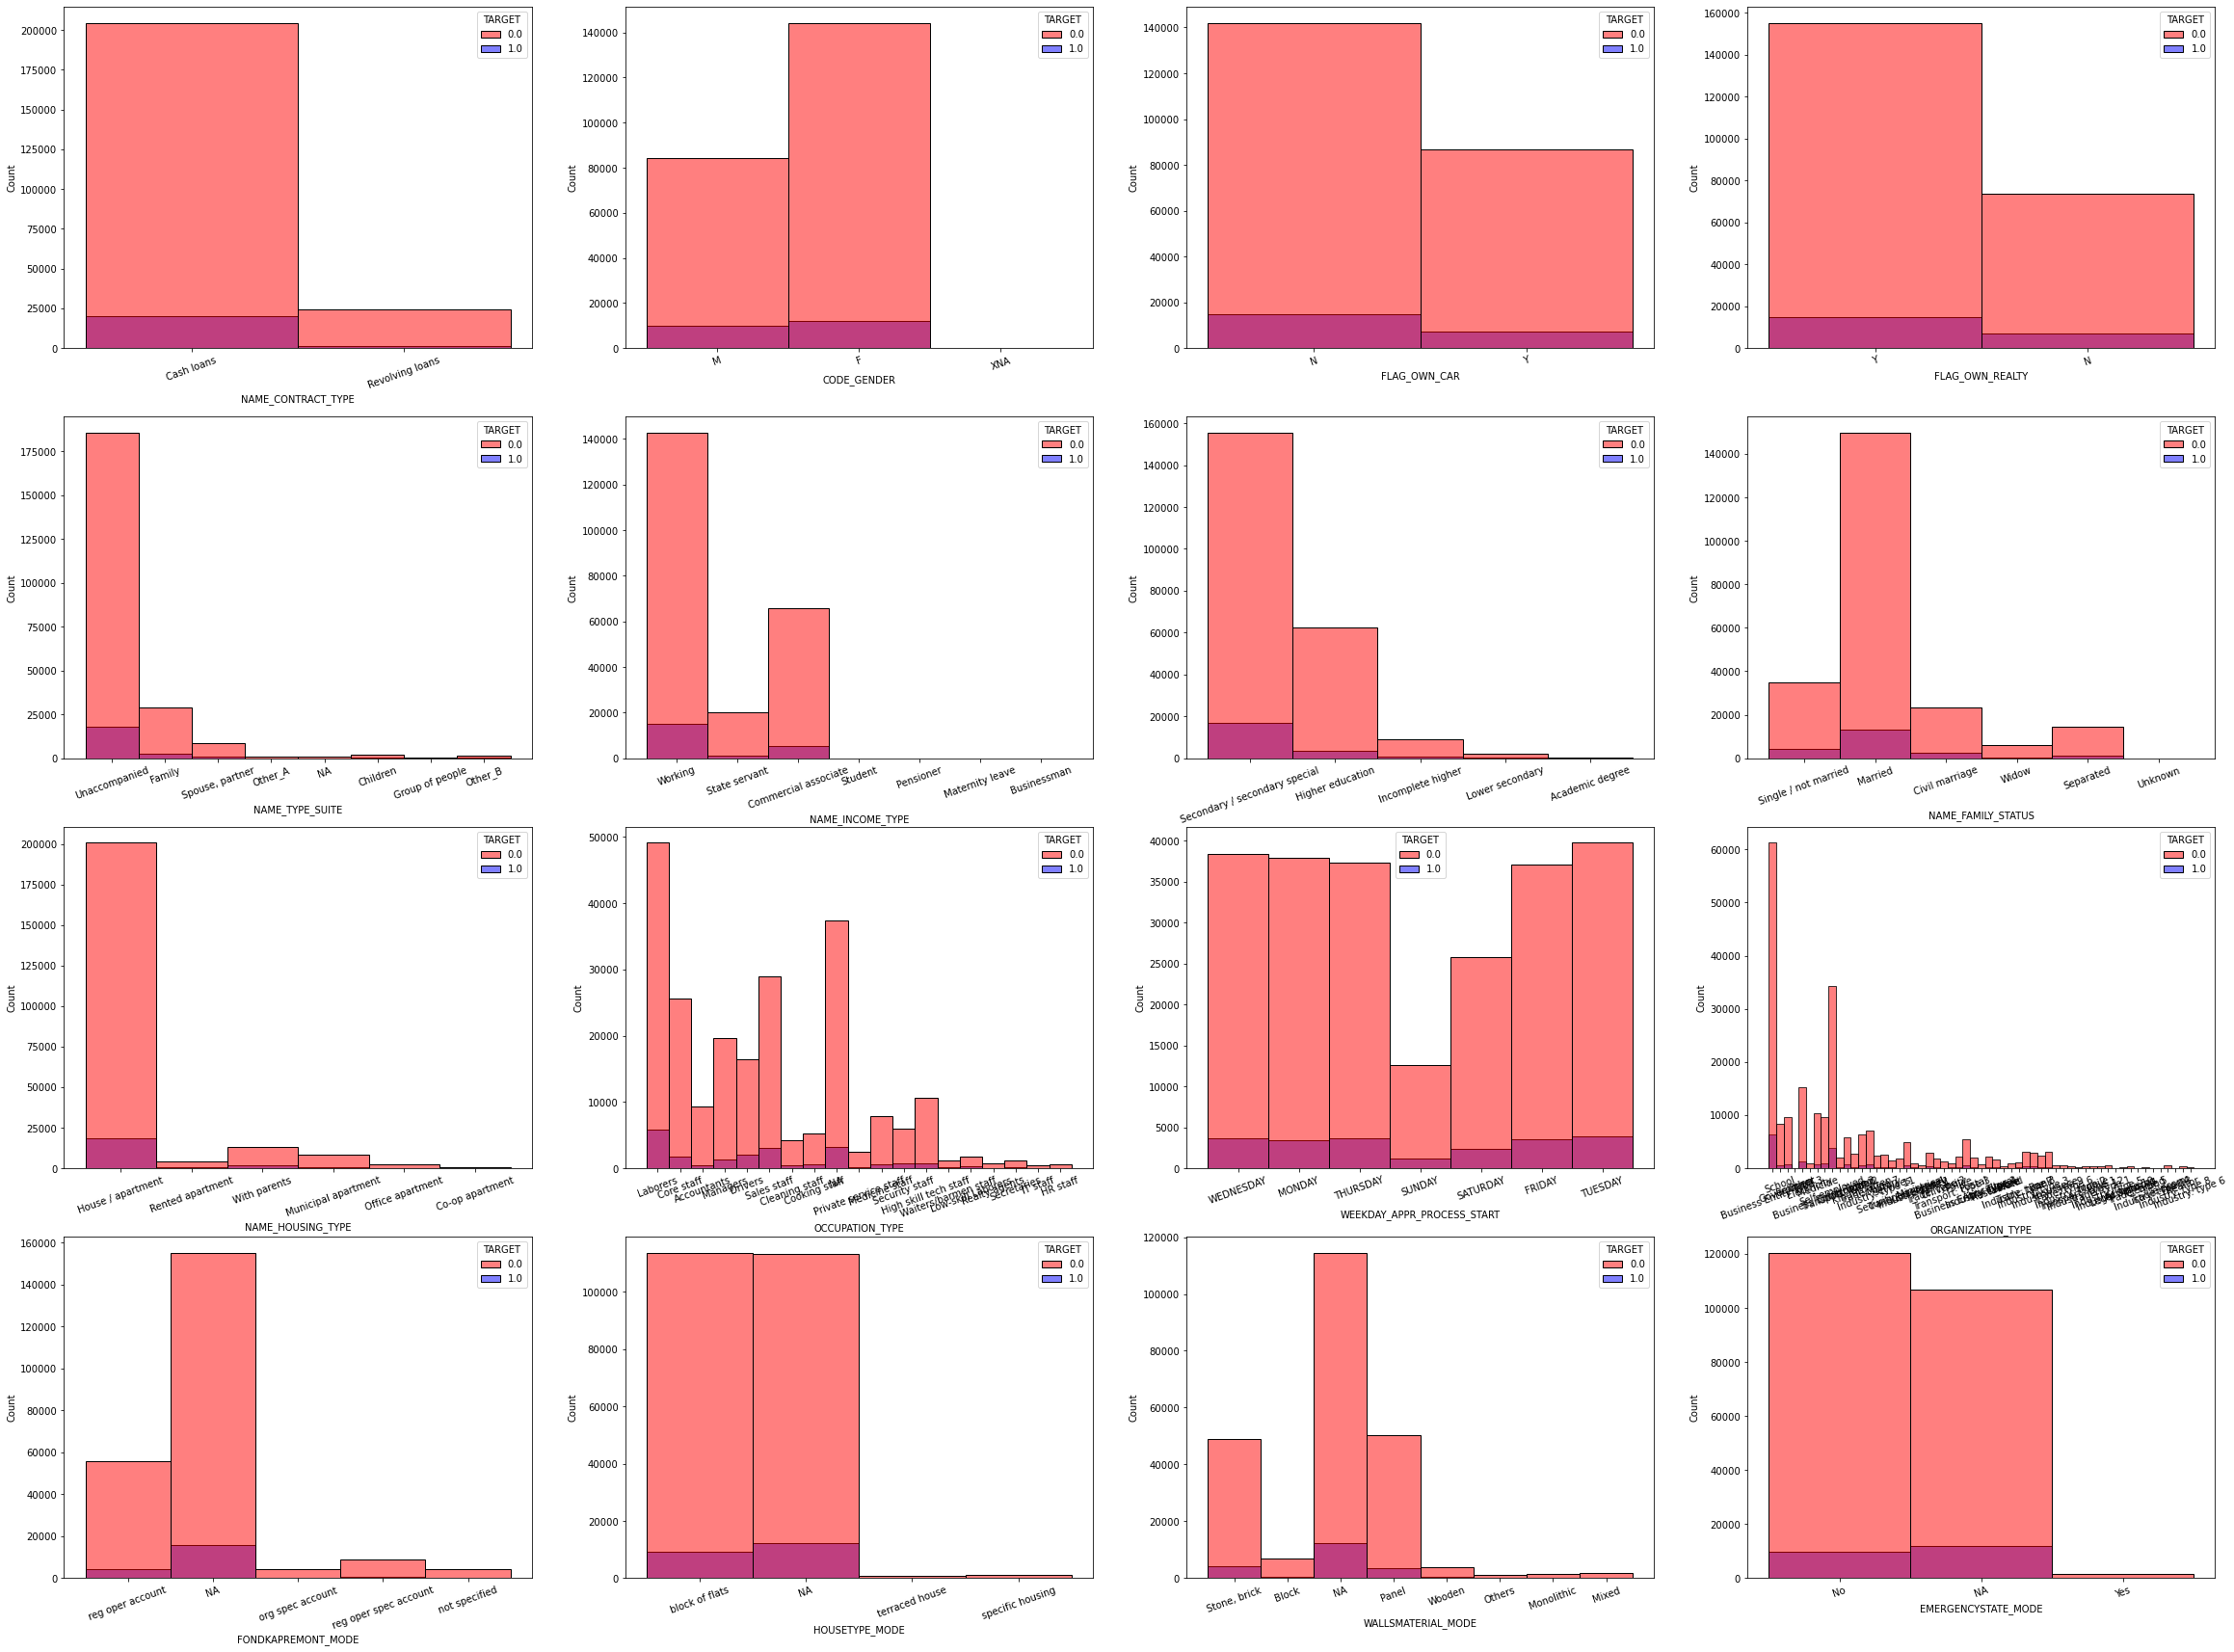

In [619]:
plt.figure(figsize = (40,30))
for i in enumerate(obj_cols):
    plt.subplot(4,4,i[0]+1)
    plt.xticks(rotation=20)
    sns.histplot(x = i[1], hue='TARGET', data=data, palette=["r", "b"])

#### Categorical Variable Correlation

In [620]:
# select object columns to investigate
obj_cor = data.filter(['TARGET', 'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 
                       'FLAG_OWN_REALTY', 'ORGANIZATION_TYPE', 'NAME_FAMILY_STATUS'])
# create dummies
obj_cor = pd.get_dummies(obj_cor, columns = obj_cor.iloc[:,1:].columns)
# correlate
obj_cor.apply(lambda x: x.corr(obj_cor.TARGET)).sort_values()

NAME_CONTRACT_TYPE_Revolving loans         -0.036012
NAME_FAMILY_STATUS_Married                 -0.029872
NAME_HOUSING_TYPE_House / apartment        -0.026419
ORGANIZATION_TYPE_School                   -0.018712
ORGANIZATION_TYPE_Medicine                 -0.015683
NAME_FAMILY_STATUS_Widow                   -0.015530
ORGANIZATION_TYPE_Military                 -0.013060
ORGANIZATION_TYPE_Police                   -0.012594
ORGANIZATION_TYPE_Government               -0.012530
ORGANIZATION_TYPE_Bank                     -0.012336
ORGANIZATION_TYPE_Security Ministries      -0.011933
ORGANIZATION_TYPE_Kindergarten             -0.009712
ORGANIZATION_TYPE_University               -0.009556
ORGANIZATION_TYPE_Other                    -0.009535
ORGANIZATION_TYPE_Industry: type 9         -0.008148
ORGANIZATION_TYPE_Trade: type 6            -0.007419
ORGANIZATION_TYPE_Industry: type 12        -0.006942
NAME_HOUSING_TYPE_Office apartment         -0.006765
ORGANIZATION_TYPE_Services                 -0.

#### Missing Categorical Variables

In [621]:
# define imputer model
imputer = SimpleImputer(missing_values = 'NA', strategy = 'most_frequent')

# fit & transform
obj_imputed = pd.DataFrame(imputer.fit_transform(data[obj_cols]))

# add imputed columns back to data
data[obj_cols] = obj_imputed

## Final Pre-Run Data Preperation

#### Choose Dummy Variables

In [622]:
data = pd.get_dummies(data, columns=['NAME_CONTRACT_TYPE'])

***
# Modeling

#### Define x & y Variable

In [623]:
y = data.TARGET
x = data.filter(['AMT_INCOME_TOTAL', 'NAME_CONTRACT_TYPE_Cash loans', 
                 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT'], axis=1)

#### Train/Test Split

In [624]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.66, random_state=0)

## Logistical Regression (Probability Run)

#### Define Model

In [625]:
from sklearn.linear_model import LogisticRegression

# due to being a logistical model and the data having a low percntage of observations with target = 1,
# setting class weight to balanced
logit = LogisticRegression()

#### Fit Model

In [626]:
logit.fit(x_train, y_train)

LogisticRegression()

In [669]:
# statsmodel trial
import statsmodels.api as sm
#x_train = sm.add_constant(x_train)
smlogit = sm.Logit(y_train, x_train).fit()
smlogit.summary()

Optimization terminated successfully.
         Current function value: 0.659771
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               302004
Model:                          Logit   Df Residuals:                   302000
Method:                           MLE   Df Model:                            3
Date:                Thu, 23 Dec 2021   Pseudo R-squ.:                 0.04815
Time:                        14:25:14   Log-Likelihood:            -1.9925e+05
converged:                       True   LL-Null:                   -2.0933e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL              -9.544e-07   3.93e-08    -24.300      0.000   -1.03e-06   -8.77e-07
NAME_CONTRACT_TYPE_Cash loans    -0.7454      0.008    -96.535      0.000      -0.761      -0.730
DAYS_EMPLOYED                     0.0001   1.89e-06     77.919      0.000       0.000       0.000
REGION_RATING_CLIENT              0.4577      0.004    111.975      0.000       0.450       0.466
=================================================================================================
"""

#### Gather Predictions and Add to Data

In [670]:
y_prob = logit.predict_proba(x_test)
x_test_p = x_test.copy()
x_test_p['TARGET'] = y_test
x_test_p['prob'] = y_prob[:,1].tolist()

### Model Score

In [628]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

#### Model Coefficients

In [630]:
coef = logit.coef_
feature_list = pd.DataFrame()
feature_list['Feature'] = x.columns.tolist()
feature_list['Coefficient'] = coef[0].T.tolist()

In [671]:
# sm coef
feature_list['sm_coef'] = smlogit.params.to_list()

#### Recursive Feature Elimination

In [672]:
from sklearn.feature_selection import RFE

rfe = RFE(logit, n_features_to_select=3)
fit = rfe.fit(x, y)
feature_list['RFE Rank'] = fit.ranking_
feature_list['RFE Include'] = fit.support_

#### Univariate Statistical Test

In [673]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

ust = SelectKBest(score_func=f_classif, k=len(x.columns))
ust_f = ust.fit(x, y)

feature_list['UST Score'] = ust_f.scores_

#### Evaluate Features

In [674]:
feature_list

,Feature,Coefficient,RFE Rank,RFE Include,UST Score,sm_coef
0,AMT_INCOME_TOTAL,-1.025743e-05,1,True,1910.318717,-9.544033e-07
1,NAME_CONTRACT_TYPE_Cash loans,-5.957071e-08,2,False,14042.542962,-7.454452e-01
2,DAYS_EMPLOYED,3.037933e-04,1,True,9946.080291,1.474701e-04
3,REGION_RATING_CLIENT,-1.644748e-07,1,True,7144.842443,4.576612e-01


#### View Sample of Estimated Probabilities

In [634]:
x_test_p.head().append(x_test_p.tail())

,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE_Cash loans,DAYS_EMPLOYED,REGION_RATING_CLIENT,TARGET,prob
10287,180000.0,1,-2462.0,1.0,0.0,0.069508
36048,225000.0,1,-6293.0,1.0,0.0,0.014490
135642,270000.0,1,-3153.0,2.0,0.0,0.023491
148927,108000.0,1,-2884.0,3.0,0.0,0.120899
178346,147600.0,1,-3865.0,2.0,1.0,0.063676
39965,144000.0,1,-3157.0,2.0,0.0,0.080458
6407,90000.0,1,-9701.0,2.0,0.0,0.020427
241631,67500.0,1,-914.0,3.0,0.0,0.274872
276772,270000.0,0,-1028.0,1.0,0.0,0.043864
4785,180000.0,1,-4517.0,2.0,0.0,0.038473


## XGBoost (Probability Run)

#### Define Model

In [635]:
from xgboost import XGBClassifier

# scale_pos_weight is the ration of 1 to 0 in the target (sum of negative instances / sum of positive instances)
xgb = XGBClassifier(n_estimators=500, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss')

#### Fit Model

In [636]:
xgb_fit = xgb.fit(x_train, y_train, 
                  early_stopping_rounds=5, 
                  eval_set=[(x_test, y_test)]
                 )

[14:10:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.65974
[1]	validation_0-logloss:0.62953
[2]	validation_0-logloss:0.60211
[3]	validation_0-logloss:0.57718
[4]	validation_0-logloss:0.55447


/Users/jameslanser/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[5]	validation_0-logloss:0.53371
[6]	validation_0-logloss:0.51467
[7]	validation_0-logloss:0.49724
[8]	validation_0-logloss:0.48124
[9]	validation_0-logloss:0.46651
[10]	validation_0-logloss:0.45297
[11]	validation_0-logloss:0.44049
[12]	validation_0-logloss:0.42900
[13]	validation_0-logloss:0.41836
[14]	validation_0-logloss:0.40858
[15]	validation_0-logloss:0.39953
[16]	validation_0-logloss:0.39116
[17]	validation_0-logloss:0.38344
[18]	validation_0-logloss:0.37629
[19]	validation_0-logloss:0.36969
[20]	validation_0-logloss:0.36358
[21]	validation_0-logloss:0.35794
[22]	validation_0-logloss:0.35272
[23]	validation_0-logloss:0.34789
[24]	validation_0-logloss:0.34343
[25]	validation_0-logloss:0.33930
[26]	validation_0-logloss:0.33549
[27]	validation_0-logloss:0.33195
[28]	validation_0-logloss:0.32870
[29]	validation_0-logloss:0.32569
[30]	validation_0-logloss:0.32291
[31]	validation_0-logloss:0.32034
[32]	validation_0-logloss:0.31798
[33]	validation_0-logloss:0.31580
[34]	validation_0-l

#### Gather Predictions and Add to Data

In [637]:
xgb_y_prob = xgb.predict_proba(x_test)
x_test_p['xgb_prob'] = xgb_y_prob[:,1].tolist()

### Model Score

In [666]:
x_test_p.head(50).append(x_test_p.tail(50))

,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE_Cash loans,DAYS_EMPLOYED,REGION_RATING_CLIENT,TARGET,prob,xgb_prob
10287,180000.0,1,-2462.0,1.0,0.0,0.069508,0.050821
36048,225000.0,1,-6293.0,1.0,0.0,0.014490,0.022662
135642,270000.0,1,-3153.0,2.0,0.0,0.023491,0.073507
148927,108000.0,1,-2884.0,3.0,0.0,0.120899,0.100923
178346,147600.0,1,-3865.0,2.0,1.0,0.063676,0.065641
89562,90000.0,1,-1423.0,2.0,1.0,0.204978,0.101508
299038,157500.0,0,-195.0,2.0,0.0,0.157787,0.111173
54496,67500.0,1,-269.0,2.0,0.0,0.315593,0.110617
207906,45000.0,1,-833.0,2.0,0.0,0.328573,0.100330
289274,180000.0,0,-3301.0,2.0,0.0,0.054725,0.063665


***
# Additional Model Runs for Target Prediction

#### Check Classification Balance

In [639]:
from collections import Counter
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f'Class={k}, n={v}, ({dist}%)')

Class=1.0, n=21740, (8.677568843775822%)
Class=0.0, n=228791, (91.32243115622418%)


#### Balance Dependent Variable Classification

In [640]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [641]:
# check
from collections import Counter
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f'Class={k}, n={v}, ({dist}%)')

Class=1.0, n=228791, (50.0%)
Class=0.0, n=228791, (50.0%)


#### Prediction Train/Test Split

In [642]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.66, random_state=0)

## Logistical Regression (Prediction Run)

#### Define Model

In [643]:
from sklearn.linear_model import LogisticRegression

# due to being a logistical model and the data having a low percntage of observations with target = 1,
# setting class weight to balanced
logit = LogisticRegression()

#### Fit Model

In [644]:
logit.fit(x_train, y_train)

LogisticRegression()

#### Gather Predictions and Add to Data

In [647]:
y_pred_t = logit.predict(x_test)
y_prob_t = logit.predict_proba(x_test)
x_test_t = x_test.copy()
x_test_t['TARGET'] = y_test
x_test_t['pred'] = y_pred_t.tolist()
x_test_t['prob'] = y_prob_t[:,1].tolist()

### Model Score

#### Accuracy

In [646]:
accuracy_score(y_test, logit.predict(x_test))

0.541329750993071

#### R-Squared

In [648]:
r2_score(y_test, y_pred_t)

-0.834685005810208

#### Mean Squared Error

In [649]:
mean_squared_error(y_test, y_pred_t)

0.458670249006929

#### Mean Absolute Error

In [650]:
mean_absolute_error(y_test, y_pred_t)

0.458670249006929

#### Confusion Matrix

In [651]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_t)

array([[49828, 28076],
       [43283, 34391]])

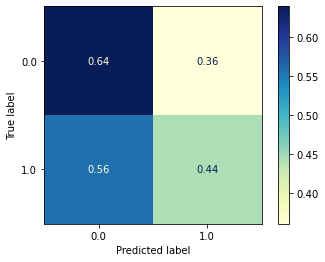

In [652]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(logit.fit(x_train, y_train), x_test, y_test,
                               cmap=plt.cm.YlGnBu,
                               normalize='true')

#### KDE Plot Actual vs. Estimate

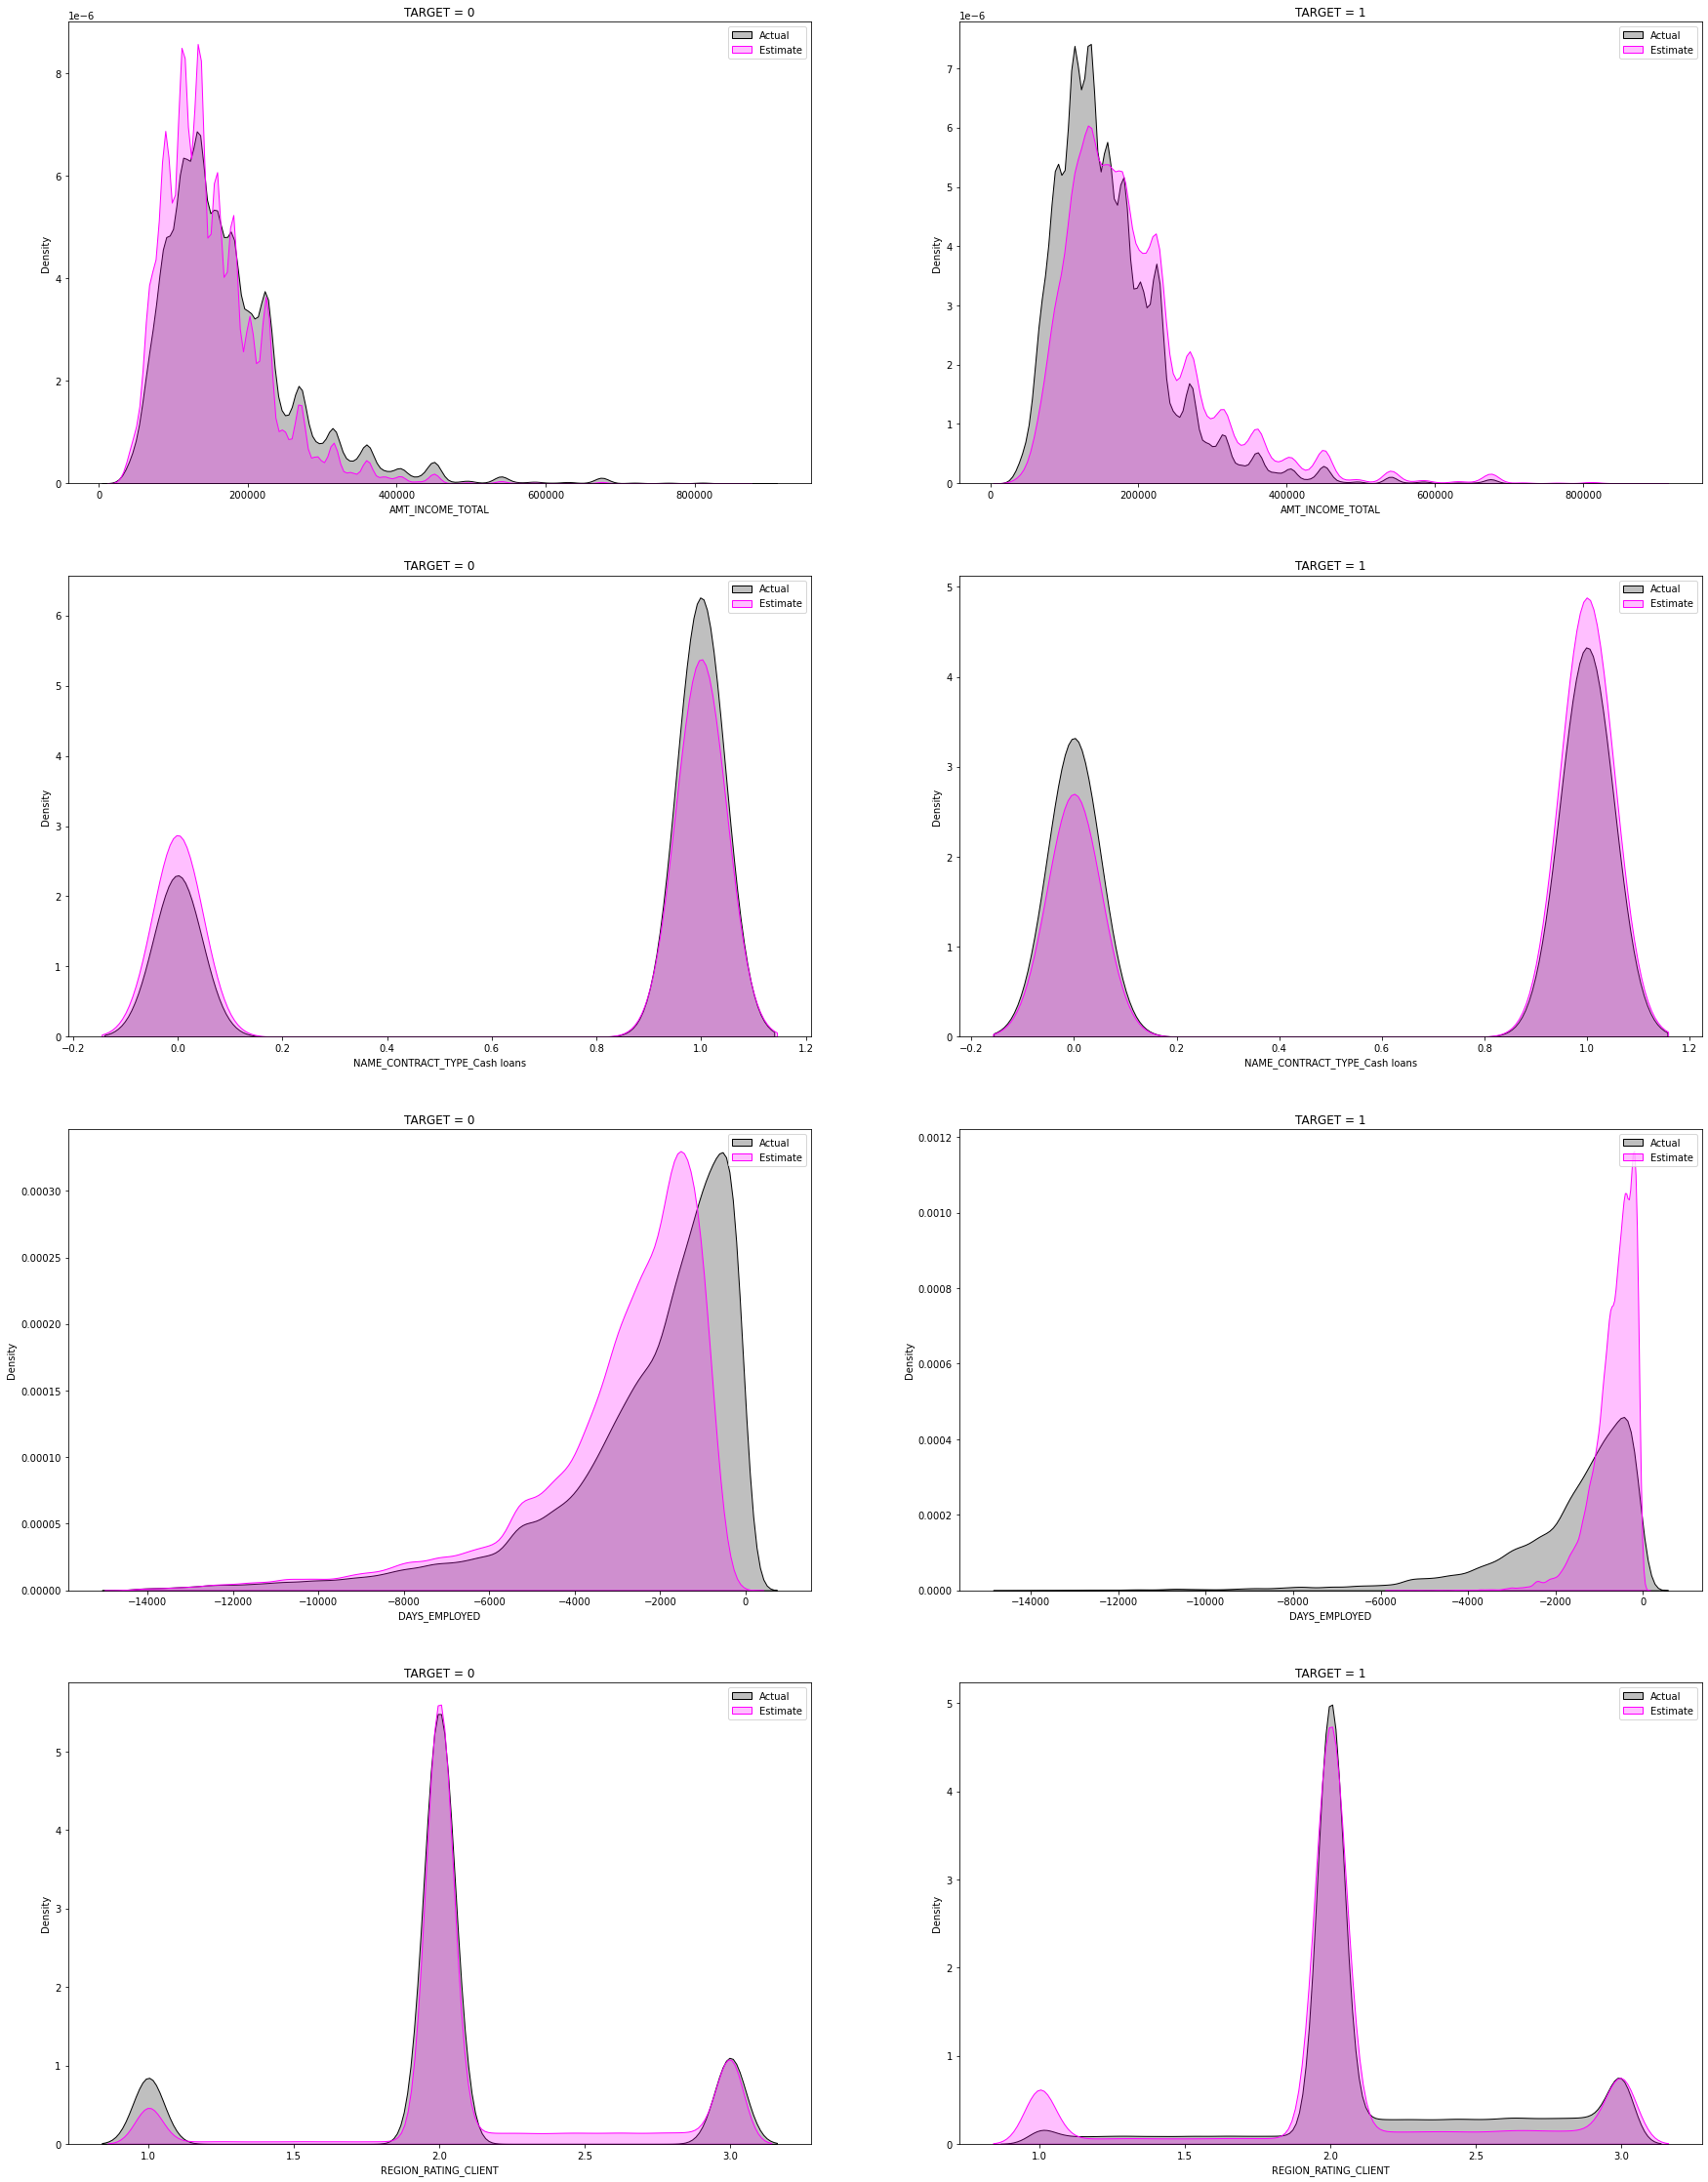

In [653]:
fig, axes = plt.subplots(len(x.columns),2, figsize=(30,40))
for i in enumerate(x_test_t.columns.drop(['TARGET', 'pred', 'prob']).tolist()):
    axes[i[0],0].set_title("TARGET = 0")
    sns.kdeplot(data = x_test_t[i[1]][x_test_t['TARGET'] == 0], shade=True, label='Actual', color='Black', ax=axes[i[0],0])
    sns.kdeplot(data = x_test_t[i[1]][x_test_t['pred'] == 0], shade=True, label='Estimate', color='Magenta', ax=axes[i[0],0])
    axes[i[0],0].legend()
    axes[i[0],1].set_title("TARGET = 1")
    sns.kdeplot(data = x_test_t[i[1]][x_test_t['TARGET'] == 1], shade=True, label='Actual', color='Black', ax=axes[i[0],1])
    sns.kdeplot(data = x_test_t[i[1]][x_test_t['pred'] == 1], shade=True, label='Estimate', color='Magenta', ax=axes[i[0],1])
    axes[i[0],1].legend()

## XGBoost (Prediction Run)

#### Define Model

In [654]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=500, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss')

#### Fit Model

In [655]:
xgb_fit = xgb.fit(x_train, y_train, 
                  early_stopping_rounds=5, 
                  eval_set=[(x_test, y_test)]
                 )

[14:10:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.67875


/Users/jameslanser/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[1]	validation_0-logloss:0.66568
[2]	validation_0-logloss:0.65389
[3]	validation_0-logloss:0.64309
[4]	validation_0-logloss:0.63325
[5]	validation_0-logloss:0.62426
[6]	validation_0-logloss:0.61593
[7]	validation_0-logloss:0.60832
[8]	validation_0-logloss:0.60134
[9]	validation_0-logloss:0.59486
[10]	validation_0-logloss:0.58886
[11]	validation_0-logloss:0.58333
[12]	validation_0-logloss:0.57815
[13]	validation_0-logloss:0.57343
[14]	validation_0-logloss:0.56898
[15]	validation_0-logloss:0.56485
[16]	validation_0-logloss:0.56101
[17]	validation_0-logloss:0.55746
[18]	validation_0-logloss:0.55413
[19]	validation_0-logloss:0.55105
[20]	validation_0-logloss:0.54813
[21]	validation_0-logloss:0.54544
[22]	validation_0-logloss:0.54289
[23]	validation_0-logloss:0.54051
[24]	validation_0-logloss:0.53828
[25]	validation_0-logloss:0.53623
[26]	validation_0-logloss:0.53425
[27]	validation_0-logloss:0.53242
[28]	validation_0-logloss:0.53070
[29]	validation_0-logloss:0.52908
[30]	validation_0-loglo

[239]	validation_0-logloss:0.49502
[240]	validation_0-logloss:0.49496
[241]	validation_0-logloss:0.49496
[242]	validation_0-logloss:0.49491
[243]	validation_0-logloss:0.49487
[244]	validation_0-logloss:0.49483
[245]	validation_0-logloss:0.49480
[246]	validation_0-logloss:0.49479
[247]	validation_0-logloss:0.49478
[248]	validation_0-logloss:0.49475
[249]	validation_0-logloss:0.49473
[250]	validation_0-logloss:0.49468
[251]	validation_0-logloss:0.49464
[252]	validation_0-logloss:0.49458
[253]	validation_0-logloss:0.49457
[254]	validation_0-logloss:0.49453
[255]	validation_0-logloss:0.49447
[256]	validation_0-logloss:0.49447
[257]	validation_0-logloss:0.49443
[258]	validation_0-logloss:0.49439
[259]	validation_0-logloss:0.49435
[260]	validation_0-logloss:0.49430
[261]	validation_0-logloss:0.49427
[262]	validation_0-logloss:0.49425
[263]	validation_0-logloss:0.49425
[264]	validation_0-logloss:0.49425
[265]	validation_0-logloss:0.49424
[266]	validation_0-logloss:0.49420
[267]	validation_0-l

[474]	validation_0-logloss:0.48797
[475]	validation_0-logloss:0.48794
[476]	validation_0-logloss:0.48788
[477]	validation_0-logloss:0.48785
[478]	validation_0-logloss:0.48779
[479]	validation_0-logloss:0.48774
[480]	validation_0-logloss:0.48769
[481]	validation_0-logloss:0.48764
[482]	validation_0-logloss:0.48758
[483]	validation_0-logloss:0.48755
[484]	validation_0-logloss:0.48753
[485]	validation_0-logloss:0.48749
[486]	validation_0-logloss:0.48744
[487]	validation_0-logloss:0.48740
[488]	validation_0-logloss:0.48739
[489]	validation_0-logloss:0.48737
[490]	validation_0-logloss:0.48736
[491]	validation_0-logloss:0.48732
[492]	validation_0-logloss:0.48728
[493]	validation_0-logloss:0.48724
[494]	validation_0-logloss:0.48723
[495]	validation_0-logloss:0.48722
[496]	validation_0-logloss:0.48718
[497]	validation_0-logloss:0.48715
[498]	validation_0-logloss:0.48713
[499]	validation_0-logloss:0.48708


#### Gather Predictions and Add to Data

In [657]:
xgb_y_pred_t = xgb.predict(x_test)
xgb_y_prob_t = xgb.predict_proba(x_test)
x_test_t['TARGET'] = y_test
x_test_t['xgb_pred'] = xgb_y_pred_t.tolist()
x_test_t['xgb_prob'] = xgb_y_prob_t[:,1].tolist()

### Model Score

#### Accuracy

In [656]:
accuracy_score(y_test, xgb.predict(x_test))

0.7321279358264022

#### R-Squared

In [658]:
r2_score(y_test, xgb_y_pred)

-0.07005080307760836

#### Mean Squared Error

In [659]:
mean_squared_error(y_test, xgb_y_pred)

0.2675121161089614

#### Mean Absolute Error

In [660]:
mean_absolute_error(y_test, xgb_y_pred)

0.2675121161089614

#### Confusion Matrix

In [661]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, xgb_y_pred)

array([[66887, 11017],
       [30602, 47072]])

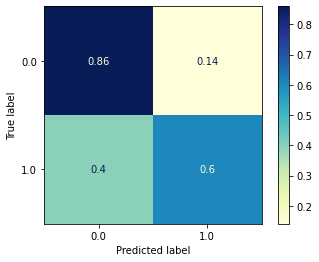

In [662]:
xgb_matrix = plot_confusion_matrix(xgb_fit, x_test, y_test, 
                                   cmap=plt.cm.YlGnBu, 
                                   normalize='true')

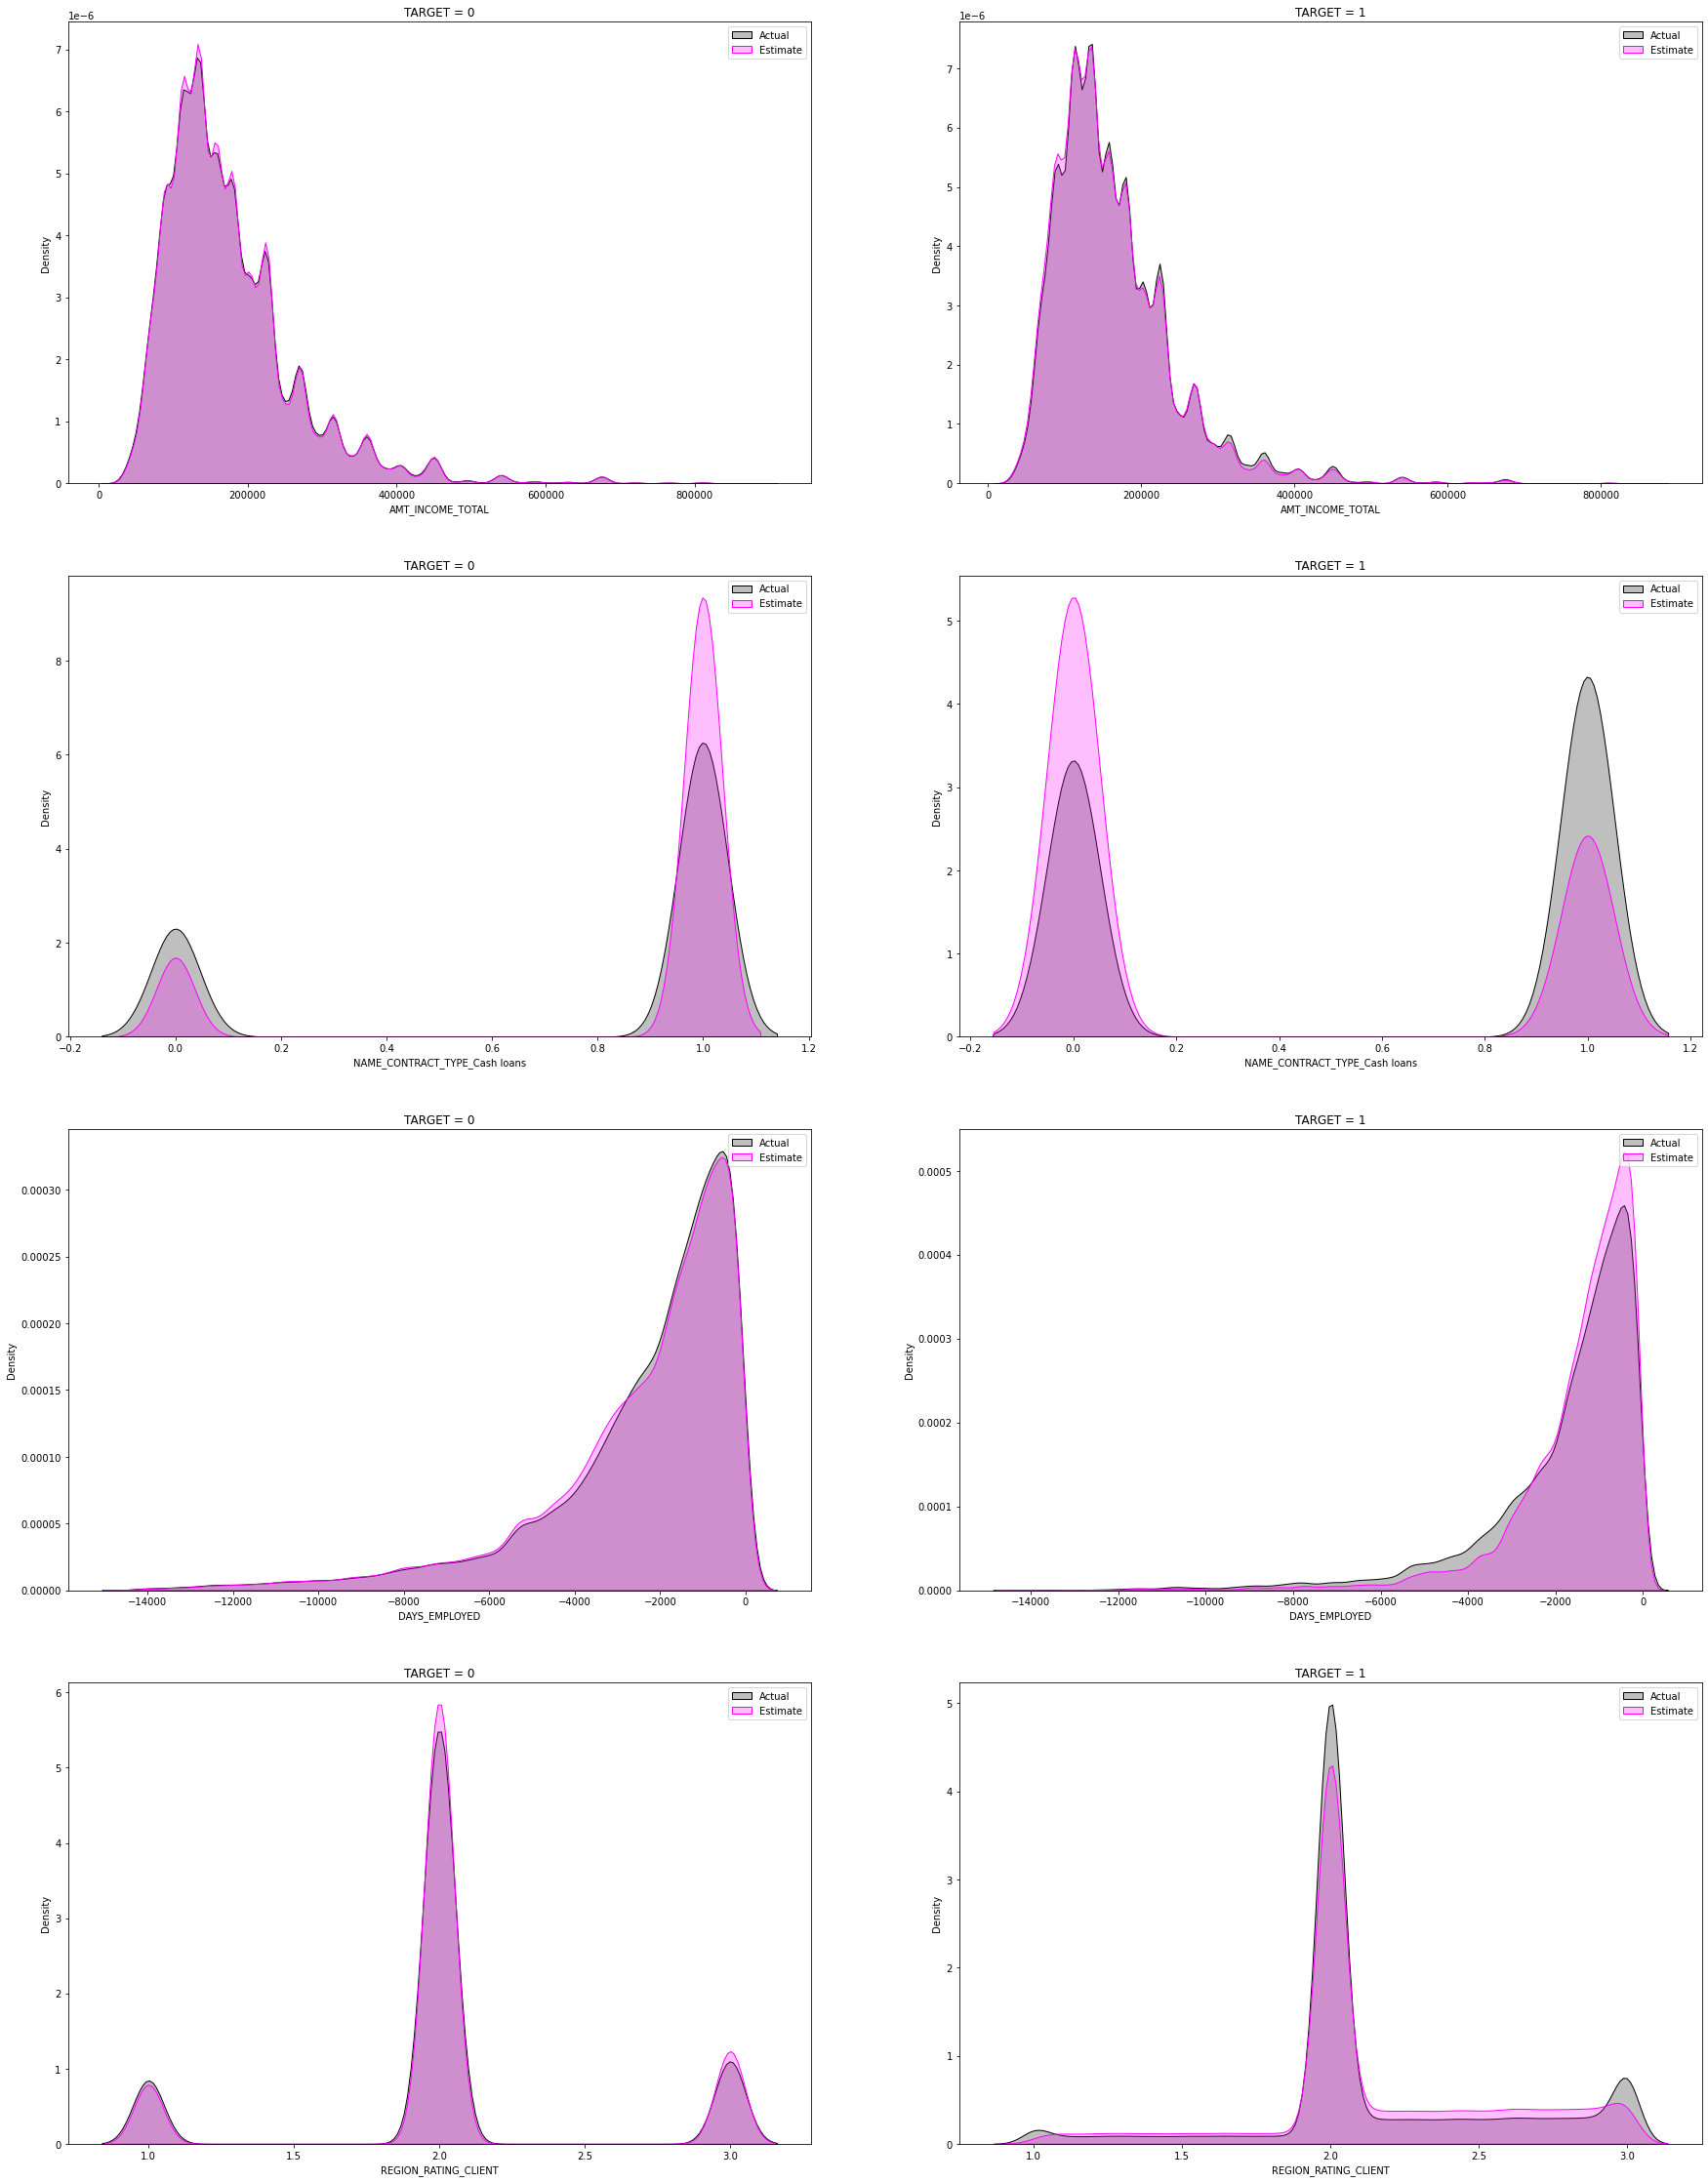

In [663]:
fig, axes = plt.subplots(len(x.columns),2, figsize=(30,40))
for i in enumerate(x_test_t.columns.drop(['TARGET', 'pred', 'prob', 'xgb_pred', 'xgb_prob']).tolist()):
    axes[i[0],0].set_title("TARGET = 0")
    sns.kdeplot(data = x_test_t[i[1]][x_test_t['TARGET'] == 0], shade=True, label='Actual', color='Black', ax=axes[i[0],0])
    sns.kdeplot(data = x_test_t[i[1]][x_test_t['xgb_pred'] == 0], shade=True, label='Estimate', color='Magenta', ax=axes[i[0],0])
    axes[i[0],0].legend()
    axes[i[0],1].set_title("TARGET = 1")
    sns.kdeplot(data = x_test_t[i[1]][x_test_t['TARGET'] == 1], shade=True, label='Actual', color='Black', ax=axes[i[0],1])
    sns.kdeplot(data = x_test_t[i[1]][x_test_t['xgb_pred'] == 1], shade=True, label='Estimate', color='Magenta', ax=axes[i[0],1])
    axes[i[0],1].legend()

In [665]:
x_test_t.head(50).append(x_test_t.tail(50))

,AMT_INCOME_TOTAL,NAME_CONTRACT_TYPE_Cash loans,DAYS_EMPLOYED,REGION_RATING_CLIENT,TARGET,pred,prob,xgb_pred,xgb_prob
175446,135000.0,1,-250.000000,2.000000,0.0,1.0,0.517326,0.0,0.438956
286393,162000.0,0,-593.967820,2.000000,1.0,1.0,0.513488,1.0,0.617302
174718,243000.0,1,-2351.000000,2.000000,0.0,0.0,0.483942,0.0,0.326892
226608,202500.0,0,-3459.000000,2.000000,0.0,0.0,0.449497,0.0,0.465308
15893,427500.0,1,-986.000000,2.000000,0.0,1.0,0.549889,0.0,0.373613
225715,130500.0,0,-3565.000000,2.000000,1.0,0.0,0.434508,0.0,0.467658
272452,135000.0,1,-268.530152,2.234924,1.0,1.0,0.516866,1.0,0.999175
143807,225000.0,1,-1122.000000,3.000000,1.0,1.0,0.511350,0.0,0.246796
442492,135000.0,0,-1679.841894,2.000000,1.0,0.0,0.481792,1.0,0.567266
390688,112500.0,0,-1128.000000,2.010613,1.0,0.0,0.491580,1.0,0.999276
